Итоговая работа
=====================

Поздравляю вас, теперь вы вооружены знаниями по предобработке данных, и пора применить их на интересном кейсе.

Представлены данные такси, по которым мы должны предсказать возьмёт ли таксист заказ или нет(driver_response).

Принципы вы знаете, чек-лист аналогичен лабораторной работе.

Чек-лист:
1. Загрузите датасет taxi.csv.
2. Посмотрите на данные. Отобразите общую информацию по признакам (вспомните о describe и info). Напишите в markdown свои наблюдения.
3. Выявите пропуски, а также возможные причины их возникновения. Решите, что следует сделать с ними. Напишите в markdown свои наблюдения.
4. Оцените зависимости переменных между собой. Используйте корреляции. Будет хорошо, если воспользуетесь profile_report. Напишите в markdown свои наблюдения.
5. Определите стратегию преобразования категориальных признаков (т.е. как их сделать адекватными для моделей).
6. Найдите признаки, которые можно разделить на другие, или преобразовать в другой тип данных. Удалите лишние, при необходимости.
7. Разделите выборку на обучаемую и тестовую.
8. Обучите модель. Напишите в markdown свои наблюдения по полученным результатам. Хорошие результаты дают классификаторы RandomForest и XGBoost

Если возникнут затруднения, то смотрите на материал практических занятий. Данного там должно хватить для выполнения всех пунктов. Желаю успеха!

In [1]:
import pandas as pd
import numpy as np

import pandas_profiling

import seaborn as sns
from matplotlib import pyplot as plt

**1. Загрузите датасет taxi.csv.**

In [2]:
data = pd.read_csv('taxi.csv')
data.head()

offer_gk  weekday_key  hour_key  driver_gk  order_gk  driver_latitude  \
0   1105373            5        20       6080    174182        55.818842   
1    759733            5        14       6080    358774        55.805342   
2    416977            6        14       6080    866260        55.813978   
3    889660            2         6       6080    163522        55.745922   
4   1120055            4        16       6080    506710        55.803578   

   driver_longitude  origin_order_latitude  origin_order_longitude  \
0         37.334562              55.814567               37.355010   
1         37.515023              55.819329               37.466398   
2         37.347688              55.814827               37.354074   
3         37.421748              55.743469               37.431130   
4         37.521602              55.812559               37.527407   

   distance_km  duration_min offer_class_group ride_type_desc  driver_response  
0       -1.000        -1.000           Economy        private                0  
1       18.802        25.217          Standard        private                1  
2        6.747         9.800           Economy        private                0  
3       -1.000        -1.000           Economy        private                1  
4       12.383        19.250           Economy        private                1

In [3]:
#list(data)

- offer_gk - идентификатор запроса/предложения
- weekday_key - день недели (ключ)
- hour_key - час в сутках (ключ)
- driver_gk - идентификатор водителя
- order_gk - идентификатор заказа
- driver_latitude - широта места нахождения таксиста
- driver_longitude - долгота места нахождения таксиста
- origin_order_latitude - широта точки заказа такси
- origin_order_longitude - долгота точки заказа такси
- distance_km - длина поездки, км ('-1' - расстояние не установлено)
- duration_min - продолжительность поезки, км ('-1' - продолжительность не установлена)
- offer_class_group - класс автомобиля
- ride_type_desc - тип пассажира
- driver_response - взял ли таксист заказ

**2. Посмотрите на данные. Отобразите общую информацию по признакам (вспомните о describe и info). Напишите в markdown свои наблюдения.**

In [4]:
data.describe(include='all')

offer_gk    weekday_key       hour_key      driver_gk  \
count   1.000000e+05  100000.000000  100000.000000  100000.000000   
unique           NaN            NaN            NaN            NaN   
top              NaN            NaN            NaN            NaN   
freq             NaN            NaN            NaN            NaN   
mean    5.662189e+05       3.159860      13.827790    3446.376360   
std     3.259360e+05       2.054222       7.306496    2038.738677   
min     4.000000e+00       0.000000       0.000000      14.000000   
25%     2.855552e+05       1.000000       8.000000    1421.000000   
50%     5.656715e+05       3.000000      16.000000    3506.500000   
75%     8.487198e+05       5.000000      20.000000    5242.000000   
max     1.130355e+06       6.000000      23.000000    6806.000000   

            order_gk  driver_latitude  driver_longitude  \
count   100000.00000    100000.000000     100000.000000   
unique           NaN              NaN               NaN   
top              NaN              NaN               NaN   
freq             NaN              NaN               NaN   
mean    460867.01291        55.700824         37.492292   
std     266064.98953         2.135903          1.454640   
min         18.00000        -1.000000         -1.000000   
25%     229178.50000        55.708651         37.413497   
50%     462420.00000        55.772904         37.533664   
75%     690894.00000        55.960667         37.624113   
max     920344.00000        56.174097         38.280547   

        origin_order_latitude  origin_order_longitude    distance_km  \
count           100000.000000           100000.000000  100000.000000   
unique                    NaN                     NaN            NaN   
top                       NaN                     NaN            NaN   
freq                      NaN                     NaN            NaN   
mean                55.772440               37.541637      18.393518   
std                  0.665985                0.467758      41.129296   
min                 -1.000000               -1.000000      -1.000000   
25%                 55.708032               37.407117      -1.000000   
50%                 55.772561               37.532537      10.411500   
75%                 55.962000               37.624358      30.665250   
max                 56.311121               38.243608    5234.283000   

         duration_min offer_class_group ride_type_desc  driver_response  
count   100000.000000            100000         100000    100000.000000  
unique            NaN                 9              4              NaN  
top               NaN           Economy        private              NaN  
freq              NaN             48335          91207              NaN  
mean        23.134841               NaN            NaN         0.492480  
std         33.890105               NaN            NaN         0.499946  
min         -1.000000               NaN            NaN         0.000000  
25%         -1.000000               NaN            NaN         0.000000  
50%         19.700000               NaN            NaN         0.000000  
75%         37.867000               NaN            NaN         1.000000  
max       3958.283000               NaN            NaN         1.000000

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 14 columns):
offer_gk                  100000 non-null int64
weekday_key               100000 non-null int64
hour_key                  100000 non-null int64
driver_gk                 100000 non-null int64
order_gk                  100000 non-null int64
driver_latitude           100000 non-null float64
driver_longitude          100000 non-null float64
origin_order_latitude     100000 non-null float64
origin_order_longitude    100000 non-null float64
distance_km               100000 non-null float64
duration_min              100000 non-null float64
offer_class_group         100000 non-null object
ride_type_desc            100000 non-null object
driver_response           100000 non-null int64
dtypes: float64(6), int64(6), object(2)
memory usage: 10.7+ MB


**Вывод:** в целом всё неплохо. Есть выбросы по продолжительности - больше двух суток в пути и дистанции - больше 5000 км. Есть также отрицательные значения - это пропуски, о них ниже.

**3. Выявите пропуски, а также возможные причины их возникновения. Решите, что следует сделать с ними. Напишите в markdown свои наблюдения.**

Пропуски отсутствуют, но есть отрицательные значения, которые обазначают отсутствие данных. От них будем избавляться. Посмотрим сколько отрицательных значений. Из предыдущего пункта мы увидили, что отрицательный значения присутствуют в шести столбцах.

In [6]:
neg = data.query('duration_min < 0 or \
                  distance_km < 0 or \
                  driver_latitude < 0 or \
                  driver_longitude < 0 or \
                  origin_order_latitude < 0 or \
                  origin_order_longitude < 0')
neg

offer_gk  weekday_key  hour_key  driver_gk  order_gk  driver_latitude  \
0       1105373            5        20       6080    174182        55.818842   
3        889660            2         6       6080    163522        55.745922   
6        103326            2        11       6080    615584        55.753508   
19       533917            5         8       6080    596531        55.913718   
21       123897            4        12       6080    185909        55.766763   
...         ...          ...       ...        ...       ...              ...   
99979   1088748            1         2       2442    458538        55.961383   
99981    397745            1        23       2442    383092        55.961397   
99987    871592            4        23       2442    802677        55.961121   
99991    619039            6        23       2442    323136        55.961239   
99994    915788            5         0       2442    636975        55.961351   

       driver_longitude  origin_order_latitude  origin_order_longitude  \
0             37.334562              55.814567               37.355010   
3             37.421748              55.743469               37.431130   
6             37.663742              55.757251               37.659064   
19            37.401395              55.921554               37.403505   
21            37.607275              55.772388               37.606330   
...                 ...                    ...                     ...   
99979         37.413560              55.962322               37.407117   
99981         37.413560              55.962322               37.407117   
99987         37.414019              55.961995               37.406355   
99991         37.413497              55.962322               37.407117   
99994         37.413864              55.964220               37.423526   

       distance_km  duration_min offer_class_group ride_type_desc  \
0             -1.0          -1.0           Economy        private   
3             -1.0          -1.0           Economy        private   
6             -1.0          -1.0          Standard       business   
19            -1.0          -1.0          Standard       business   
21            -1.0          -1.0          Standard       business   
...            ...           ...               ...            ...   
99979         -1.0          -1.0          Standard        private   
99981         -1.0          -1.0          Standard        private   
99987         -1.0          -1.0          Standard        private   
99991         -1.0          -1.0          Standard        private   
99994         -1.0          -1.0           Economy        private   

       driver_response  
0                    0  
3                    1  
6                    1  
19                   0  
21                   0  
...                ...  
99979                0  
99981                0  
99987                0  
99991                0  
99994                0  

[26236 rows x 14 columns]

In [7]:
# Удаляем строки с отрицательными значениями путем вычитания датафрейма
# с отрицательными значениями из предыдущего пункта
df_pos = data[~data.index.isin(neg.index)]

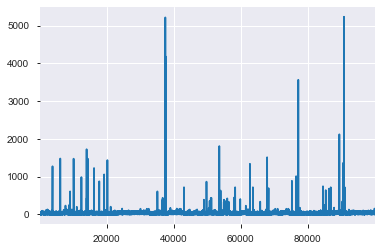

In [8]:
df_pos['distance_km'].plot()

**4. Оцените зависимости переменных между собой. Используйте корреляции. Будет хорошо, если воспользуетесь profile_report. Напишите в markdown свои наблюдения.**

In [9]:
pandas_profiling.ProfileReport(df_pos)

**Вывод:** 
- из предупреждений видно, что 'duration_min' имеет высокую корреляцию с 'distance_km', в модели будем убирать продолжительность в минутах, так как растояние нам может пригодиться.
- также высокие значения корреляции присутствуют в координатах водителя и места заказа  

**5. Определите стратегию преобразования категориальных признаков (т.е. как их сделать адекватными для моделей).**

Text(0.5, 1.0, 'Распределение данных по часам заказа')

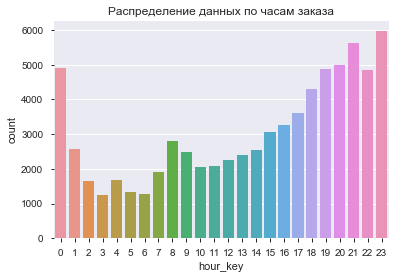

In [10]:
# Помотрим распределения по часам 'hour_key'
sns.countplot(x='hour_key', data=df_pos)
#plt.xticks(rotation=90)
plt.title('Распределение данных по часам заказа')

Разобьем признак 'hour_key' на четыре группы: утро, день, вечер, ночь. Справедливее нулевой час отнести к вечеру, а не к нночи. Заменим 0-ой час 24-м часом, и 'weekday_key' на один меньше.

**6. Найдите признаки, которые можно разделить на другие, или преобразовать в другой тип данных. Удалите лишние, при необходимости.**

Удалим столбцы: offer_gk, driver_gk, order_gk, duration_min

In [11]:
# Удалим столбцы: offer_gk, driver_gk, order_gk, distance_km
df_pos.drop(['offer_gk', 'driver_gk', 'order_gk', 'duration_min'], axis=1, inplace=True )

In [12]:
df_clear = df_pos.reset_index().drop('index', axis=1)

In [13]:
df_clear1 = df_clear #чтобы не портить df, долго путался в след. строке кода

In [14]:
# Заменим 0-ой час 24-м часом, и 'weekday_key' на один меньше.
for i, val in enumerate(df_clear1['hour_key']):
    if val == 0: 
        df_clear1.loc[i, 'hour_key'] = 24
        df_clear1.loc[i, 'weekday_key'] = df_clear1.loc[i, 'weekday_key'] - 1
        if df_clear1.loc[i, 'weekday_key'] < 0:
            df_clear1.loc[i, 'weekday_key'] = 6

Text(0.5, 1.0, 'Распределение данных по часам заказа')

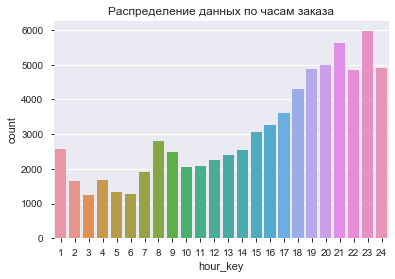

In [15]:
# Проверяем
sns.countplot(x='hour_key', data=df_clear1)
plt.title('Распределение данных по часам заказа')

In [16]:
# Формируем классы по часам
bins = np.linspace(min(df_clear1['hour_key']), max(df_clear1['hour_key']), 5)
group_names = ['ночь', 'утро', 'день', 'вечер']
df_clear1['hour_key_binned'] = pd.cut(df_clear1['hour_key'], bins, labels=group_names, include_lowest=True)

Text(0.5, 1.0, 'Распределение данных по чатям суток')

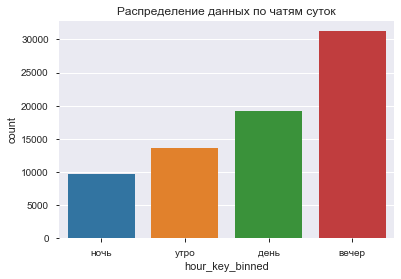

In [17]:
sns.countplot(x='hour_key_binned', data=df_clear1)
plt.title('Распределение данных по чатям суток')

In [18]:
df_clear1.head()

weekday_key  hour_key  driver_latitude  driver_longitude  \
0            5        14        55.805342         37.515023   
1            6        14        55.813978         37.347688   
2            4        16        55.803578         37.521602   
3            6        15        55.818963         37.361033   
4            5        20        55.839318         37.248862   

   origin_order_latitude  origin_order_longitude  distance_km  \
0              55.819329               37.466398       18.802   
1              55.814827               37.354074        6.747   
2              55.812559               37.527407       12.383   
3              55.814827               37.354074        6.747   
4              55.839134               37.304101        1.517   

  offer_class_group ride_type_desc  driver_response hour_key_binned  
0          Standard        private                1            день  
1           Economy        private                0            день  
2           Economy        private                1            день  
3           Economy        private                0            день  
4           Economy        private                0           вечер

In [19]:
# Для понимания принципов работы с координатами
from geopy.distance import geodesic

origin = (30.172705, 31.526725)  # (latitude, longitude) don't confuse
dist = (30.288281, 31.732326)

print(geodesic(origin, dist).meters)  # 23576.805481751613
print(geodesic(origin, dist).kilometers)  # 23.576805481751613
print(geodesic(origin, dist).miles)  # 14.64994773134371

23576.805481751613
23.576805481751613
14.64994773134371


In [20]:
# время работы - 20 сек.

from geopy.distance import geodesic
# (latitude, longitude) don't confuse

for i in range(len(df_clear1)):
    driver = (df_clear1.loc[i, 'driver_latitude'], df_clear1.loc[i, 'driver_longitude'])   # tuple
    origin = (df_clear1.loc[i, 'origin_order_latitude'], df_clear1.loc[i, 'origin_order_longitude'])   # tuple
    df_clear1.loc[i, 'distance'] = geodesic(driver, origin).kilometers

In [21]:
df_clear1.head()

weekday_key  hour_key  driver_latitude  driver_longitude  \
0            5        14        55.805342         37.515023   
1            6        14        55.813978         37.347688   
2            4        16        55.803578         37.521602   
3            6        15        55.818963         37.361033   
4            5        20        55.839318         37.248862   

   origin_order_latitude  origin_order_longitude  distance_km  \
0              55.819329               37.466398       18.802   
1              55.814827               37.354074        6.747   
2              55.812559               37.527407       12.383   
3              55.814827               37.354074        6.747   
4              55.839134               37.304101        1.517   

  offer_class_group ride_type_desc  driver_response hour_key_binned  distance  
0          Standard        private                1            день  3.423260  
1           Economy        private                0            день  0.411356  
2           Economy        private                1            день  1.064116  
3           Economy        private                0            день  0.634321  
4           Economy        private                0           вечер  3.460869

In [22]:
# Уберем ненужные колонки с координатами
df_clear1.drop(['driver_latitude', 
                'driver_longitude', 
                'origin_order_latitude', 
                'origin_order_longitude', 
                'hour_key'], axis=1, inplace=True )

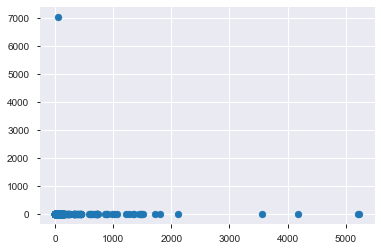

In [23]:
plt.scatter(df_clear1['distance_km'], df_clear1['distance'])

In [24]:
#Есть явные выбросы по дистанциям, очитим DF от них

long = df_clear1.query('distance_km > 2000 or distance > 1000')
long

weekday_key  distance_km offer_class_group ride_type_desc  \
28246            1     5215.793               VIP        private   
28348            6     4177.900          Standard        private   
41323            0       43.726           Economy        private   
57292            2     3563.968          Standard        private   
66138            5     2120.626          Standard        private   
67139            5     5234.283          Standard        private   

       driver_response hour_key_binned     distance  
28246                1            день     1.485070  
28348                1            день     0.265660  
41323                0            день  7035.421094  
57292                1           вечер     1.133270  
66138                1           вечер     1.505390  
67139                0            ночь     1.756789

In [25]:
df_clear2 = df_clear1[~df_clear1.index.isin(long.index)]

In [26]:
df_clear2.describe(include='all')

weekday_key   distance_km offer_class_group ride_type_desc  \
count   73758.000000  73758.000000             73758          73758   
unique           NaN           NaN                 8              3   
top              NaN           NaN           Economy        private   
freq             NaN           NaN             40816          73586   
mean        3.166341     25.002177               NaN            NaN   
std         2.083549     30.259609               NaN            NaN   
min         0.000000      0.000000               NaN            NaN   
25%         1.000000      7.900250               NaN            NaN   
50%         3.000000     18.604000               NaN            NaN   
75%         5.000000     38.729500               NaN            NaN   
max         6.000000   1808.875000               NaN            NaN   

        driver_response hour_key_binned      distance  
count      73758.000000           73758  73758.000000  
unique              NaN               4           NaN  
top                 NaN           вечер           NaN  
freq                NaN           31234           NaN  
mean           0.471610             NaN      0.989628  
std            0.499197             NaN      0.942869  
min            0.000000             NaN      0.000000  
25%            0.000000             NaN      0.405847  
50%            0.000000             NaN      0.651290  
75%            1.000000             NaN      1.318482  
max            1.000000             NaN     22.358308

In [27]:
# Можно считать, что SMB в 'ride_type_desc' - это данные отсутствуют 
smb = df_clear2.query('ride_type_desc == "SMB"')
smb

weekday_key  distance_km offer_class_group ride_type_desc  \
2335             4        5.593           Economy            SMB   
5506             4       23.270           Economy            SMB   
10376            3       12.060           Economy            SMB   
13428            5        5.300           Economy            SMB   
14155            3       23.995           Economy            SMB   
16263            6       15.449           Economy            SMB   
19166            3       51.891           Economy            SMB   
20106            3       51.891           Economy            SMB   
26590            4       37.631           Economy            SMB   
31496            5       26.330           Economy            SMB   
40051            4        9.622           Economy            SMB   
56152            4       16.118           Economy            SMB   
59366            3        5.593           Economy            SMB   
61936            5        5.267           Economy            SMB   
65510            4       43.201           Economy            SMB   
66067            3       51.891           Economy            SMB   
70394            5       26.330           Economy            SMB   
70552            4       43.201           Economy            SMB   
71765            3        8.173           Economy            SMB   

       driver_response hour_key_binned  distance  
2335                 1            день  0.336617  
5506                 1            день  1.655948  
10376                1            утро  1.368004  
13428                1            день  1.316981  
14155                1           вечер  1.866170  
16263                1            ночь  0.693897  
19166                0           вечер  0.397906  
20106                0           вечер  0.148260  
26590                0            ночь  0.616361  
31496                0           вечер  0.205277  
40051                1            день  0.793832  
56152                1            день  0.557894  
59366                1            день  0.853865  
61936                1            день  0.946699  
65510                0           вечер  0.492946  
66067                0           вечер  0.492946  
70394                0           вечер  0.212158  
70552                0           вечер  1.259877  
71765                0           вечер  0.011387

In [28]:
# Этих значений всего 19 на всю выборку из 73758 значений
df_clear3 = df_clear2[~df_clear2.index.isin(smb.index)]

In [29]:
# Заменим тип данных weekday_key c int64 на object, чтобы дни недели стали классами
df_clear3['weekday_key'] = df_clear3['weekday_key'].astype('object')

In [30]:
df_clear3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73739 entries, 0 to 73763
Data columns (total 7 columns):
weekday_key          73739 non-null object
distance_km          73739 non-null float64
offer_class_group    73739 non-null object
ride_type_desc       73739 non-null object
driver_response      73739 non-null int64
hour_key_binned      73739 non-null category
distance             73739 non-null float64
dtypes: category(1), float64(2), int64(1), object(3)
memory usage: 4.0+ MB


#### Обучение

In [31]:
# Используем принцип one_hot для всех классовых признаков
df_clear4 = pd.get_dummies(df_clear3)
df_clear4.head()

distance_km  driver_response  distance  weekday_key_0  weekday_key_1  \
0       18.802                1  3.423260              0              0   
1        6.747                0  0.411356              0              0   
2       12.383                1  1.064116              0              0   
3        6.747                0  0.634321              0              0   
4        1.517                0  3.460869              0              0   

   weekday_key_2  weekday_key_3  weekday_key_4  weekday_key_5  weekday_key_6  \
0              0              0              0              1              0   
1              0              0              0              0              1   
2              0              0              1              0              0   
3              0              0              0              0              1   
4              0              0              0              1              0   

   ...  offer_class_group_Standard  offer_class_group_VIP  \
0  ...                           1                      0   
1  ...                           0                      0   
2  ...                           0                      0   
3  ...                           0                      0   
4  ...                           0                      0   

   offer_class_group_VIP+  offer_class_group_XL  ride_type_desc_business  \
0                       0                     0                        0   
1                       0                     0                        0   
2                       0                     0                        0   
3                       0                     0                        0   
4                       0                     0                        0   

   ride_type_desc_private  hour_key_binned_ночь  hour_key_binned_утро  \
0                       1                     0                     0   
1                       1                     0                     0   
2                       1                     0                     0   
3                       1                     0                     0   
4                       1                     0                     0   

   hour_key_binned_день  hour_key_binned_вечер  
0                     1                      0  
1                     1                      0  
2                     1                      0  
3                     1                      0  
4                     0                      1  

[5 rows x 24 columns]

In [32]:
df_clear4.columns

Index(['distance_km', 'driver_response', 'distance', 'weekday_key_0',
       'weekday_key_1', 'weekday_key_2', 'weekday_key_3', 'weekday_key_4',
       'weekday_key_5', 'weekday_key_6', 'offer_class_group_Delivery',
       'offer_class_group_Economy', 'offer_class_group_Kids',
       'offer_class_group_Premium', 'offer_class_group_Standard',
       'offer_class_group_VIP', 'offer_class_group_VIP+',
       'offer_class_group_XL', 'ride_type_desc_business',
       'ride_type_desc_private', 'hour_key_binned_ночь',
       'hour_key_binned_утро', 'hour_key_binned_день',
       'hour_key_binned_вечер'],
      dtype='object')

In [33]:
# Формируем признаки и целевую переменную
X = df_clear4.drop(['driver_response'], axis = 1)
y = df_clear4['driver_response']

In [34]:
# Разделяем данные на данные для обучения и проверки
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

In [35]:
# Приводим данные к одному масштабу
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [36]:
# Модель RandomForestClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score 

model_rf = RandomForestClassifier(criterion='gini', max_depth=10, n_estimators=100)
model_rf.fit(X_train, y_train)

predicted_classes_rf = model_rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, predicted_classes_rf)

from sklearn.metrics import classification_report
print(classification_report(y_test, predicted_classes_rf))

print('Точность предсказания модели: ', accuracy_rf)

              precision    recall  f1-score   support

           0       0.77      0.66      0.71      7752
           1       0.67      0.78      0.72      6996

    accuracy                           0.71     14748
   macro avg       0.72      0.72      0.71     14748
weighted avg       0.72      0.71      0.71     14748

Точность предсказания модели:  0.7140629237862761


No handles with labels found to put in legend.


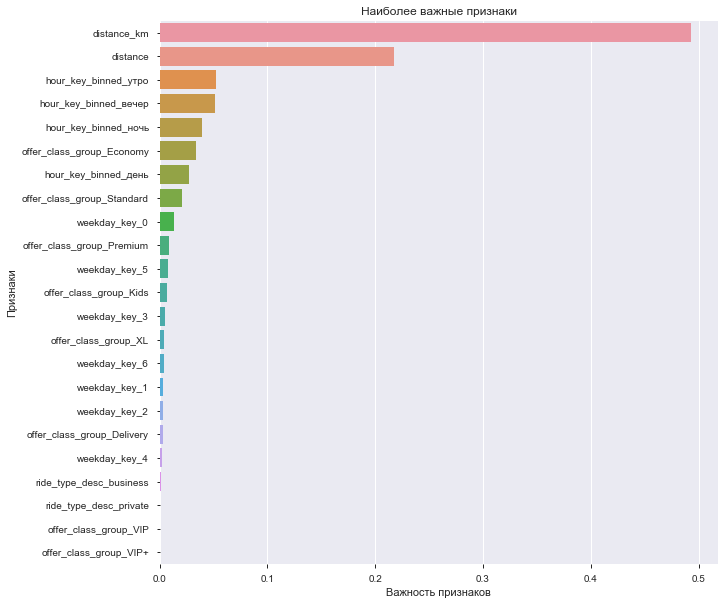

In [37]:
headers = list(X.columns.values)

feature_imp = pd.Series(model_rf.feature_importances_,index=headers).sort_values(ascending=False)

f, ax = plt.subplots(figsize=(10, 10))
sns.barplot(x=feature_imp, y=feature_imp.index)

plt.xlabel('Важность признаков')
plt.ylabel('Признаки')
plt.title("Наиболее важные признаки")
plt.legend()
plt.show()

Точность модели получилась средняя, но самое интересное, что самый важный параметр - это рассотяние, которое проехал пассажир и рассотяние с места нахождения водителя до места получения заказа

In [38]:
# Оставим только важные признаки: расстояния и время заказа
X_ = df_clear4[['distance_km','distance', 'hour_key_binned_ночь',
       'hour_key_binned_утро', 'hour_key_binned_день',
       'hour_key_binned_вечер']]
y_ = df_clear4['driver_response']

In [39]:
# Разделяем данные на данные для обучения и проверки
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_, y_, test_size=0.2, random_state=30)

In [40]:
# Приводим данные к одному масштабу
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [41]:
model_rf1 = RandomForestClassifier(criterion='gini', max_depth=10, n_estimators=100)
model_rf1.fit(X_train, y_train)

predicted_classes_rf1 = model_rf1.predict(X_test)
accuracy_rf1 = accuracy_score(y_test, predicted_classes_rf1)

print(classification_report(y_test, predicted_classes_rf1))

print('Точность предсказания модели: ', accuracy_rf1)

              precision    recall  f1-score   support

           0       0.76      0.64      0.69      7752
           1       0.66      0.78      0.72      6996

    accuracy                           0.71     14748
   macro avg       0.71      0.71      0.70     14748
weighted avg       0.71      0.71      0.70     14748

Точность предсказания модели:  0.7050447518307568


Точность модели почти не изменилась.  
**Вывод:** для того, чтобы с точностью 71% утверждать примет ли заказ водитель, достаточно иметь информацию о времени заказа такси, протяженности предполагаемой поездки и расстоянию до заказчика.

In [42]:
# Модель XGBClassifier

import xgboost

model_xgb = xgboost.XGBClassifier(max_depth=10, n_estimators=100)
model_xgb.fit(X_train, y_train)

y_pred = model_xgb.predict(X_test)
accuracy_xgb = accuracy_score(y_test, y_pred)

print(classification_report(y_test, y_pred))

print('Точность предсказания модели: ', accuracy_xgb)

              precision    recall  f1-score   support

           0       0.78      0.64      0.70      7752
           1       0.66      0.80      0.72      6996

    accuracy                           0.71     14748
   macro avg       0.72      0.72      0.71     14748
weighted avg       0.72      0.71      0.71     14748

Точность предсказания модели:  0.7126390018985626


In [43]:
# Модель Логистической регрессии

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(classification_report(y_test, y_pred))

print('Точность предсказания модели: ', accuracy)

              precision    recall  f1-score   support

           0       0.70      0.69      0.70      7752
           1       0.66      0.68      0.67      6996

    accuracy                           0.68     14748
   macro avg       0.68      0.68      0.68     14748
weighted avg       0.68      0.68      0.68     14748

Точность предсказания модели:  0.6836859235150529


**На уменьшенных данных лучший результат показала модель XGBClassifier.**